# UN Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("/Users/bentonwang/My_Documents/NSS_DS8_Projects/un-exploration-MultidisciplinaryDeepDives/data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes,Value Footnotes.1
0,Afghanistan,2021,1673.964059,NaN,NaN
1,Afghanistan,2020,2078.595086,NaN,NaN
2,Afghanistan,2019,2168.133765,NaN,NaN
3,Afghanistan,2018,2110.239384,NaN,NaN
4,Afghanistan,2017,2096.093111,NaN,NaN
5,Afghanistan,2016,2023.834656,NaN,NaN
6,Afghanistan,2015,2128.125938,NaN,NaN
7,Afghanistan,2014,2110.829568,NaN,NaN
8,Afghanistan,2013,2062.059176,NaN,NaN
9,Afghanistan,2012,1958.447627,NaN,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes,Value Footnotes.1
7718,Zimbabwe,1999,2279.549784,NaN,NaN
7719,Zimbabwe,1998,2299.395445,NaN,NaN
7720,Zimbabwe,1997,2246.209391,NaN,NaN
7721,Zimbabwe,1996,2185.928529,NaN,NaN
7722,Zimbabwe,1995,1977.675574,NaN,NaN
7723,Zimbabwe,1994,1958.125362,NaN,NaN
7724,Zimbabwe,1993,1765.451299,NaN,NaN
7725,Zimbabwe,1992,1731.232787,NaN,NaN
7726,Zimbabwe,1991,1907.652489,NaN,NaN
7727,Zimbabwe,1990,1794.153646,NaN,NaN


In [5]:
gdp_df = gdp_df.drop(['Value Footnotes', 'Value Footnotes.1'], axis=1)

In [6]:
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Value": "GDP_Per_Capita"})

In [7]:
gdp_df.shape

(7728, 3)

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1673.964059
1,Afghanistan,2020,2078.595086
2,Afghanistan,2019,2168.133765
3,Afghanistan,2018,2110.239384
4,Afghanistan,2017,2096.093111
...,...,...,...
7723,Zimbabwe,1994,1958.125362
7724,Zimbabwe,1993,1765.451299
7725,Zimbabwe,1992,1731.232787
7726,Zimbabwe,1991,1907.652489


In [9]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [10]:
Year_series = gdp_df['Year'].squeeze()
Year_series

0       2021
1       2020
2       2019
3       2018
4       2017
        ... 
7723    1994
7724    1993
7725    1992
7726    1991
7727    1990
Name: Year, Length: 7728, dtype: int64

In [11]:
Year_array = pd.unique(pd.Series(Year_series))
Year_array 

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [12]:
gdp_df.groupby("Year").size()

Year
1990    208
1991    210
1992    213
1993    214
1994    216
1995    226
1996    226
1997    227
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    239
2005    239
2006    240
2007    240
2008    242
2009    243
2010    243
2011    244
2012    242
2013    244
2014    243
2015    243
2016    242
2017    242
2018    242
2019    242
2020    241
2021    241
2022    232
dtype: int64

### Q7: more recent years have more observations, generally speaking

In [13]:
Country_series = gdp_df['Country'].squeeze()
Country_series

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
7723       Zimbabwe
7724       Zimbabwe
7725       Zimbabwe
7726       Zimbabwe
7727       Zimbabwe
Name: Country, Length: 7728, dtype: object

In [14]:
unique_Country_array = pd.unique(pd.Series(Country_series))
unique_Country_array

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
 

### Q8a: 246 - 1 ("The World") = 245 countries and regions are represented

In [15]:
len(unique_Country_array)

246

### Q8b: Afghanistan Africa (Eastern, Southern, Western, and Central), Albania, and Algeria have the fewest entries in this dataset. 

In [16]:
gdp_df.groupby("Country").size()

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
West Bank and Gaza             29
World                          33
Yemen                          24
Zambia                         33
Zimbabwe                       33
Length: 246, dtype: int64

### Q8c: these countries may have the least, very likely due to being plagued by armed conflicts and/or paucity of robust data infrastructure

Q9 steps:

In [17]:
gdp_2021 = gdp_df[gdp_df['Year']==2021]
gdp_2021

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1673.964059
21,Africa Eastern and Southern,2021,3858.004651
54,Africa Western and Central,2021,4429.952133
87,Albania,2021,15532.706056
120,Algeria,2021,12170.193777
...,...,...,...
7544,Viet Nam,2021,11727.795733
7577,West Bank and Gaza,2021,6224.656776
7606,World,2021,18780.780368
7663,Zambia,2021,3571.661386


Q10 steps:

In [18]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,22854.595385
std,0.0,23135.733081
min,2021.0,787.942779
25%,2021.0,5566.059537
50%,2021.0,15177.849708
75%,2021.0,34043.304688
max,2021.0,131511.020155


Q11 steps:

In [21]:
GDP_Per_Capita_series = gdp_df['GDP_Per_Capita'].squeeze()
GDP_Per_Capita_series

In [22]:
GDP_Per_Capita_2021_series = gdp_2021['GDP_Per_Capita'].squeeze()
GDP_Per_Capita_2021_series

0        1673.964059
21       3858.004651
54       4429.952133
87      15532.706056
120     12170.193777
            ...     
7544    11727.795733
7577     6224.656776
7606    18780.780368
7663     3571.661386
7696     2333.973632
Name: GDP_Per_Capita, Length: 241, dtype: float64

(array([4.326e+03, 1.479e+03, 7.550e+02, 4.620e+02, 2.900e+02, 1.620e+02,
        9.300e+01, 5.500e+01, 3.900e+01, 2.400e+01, 1.100e+01, 1.200e+01,
        1.000e+01, 2.000e+00, 5.000e+00, 2.000e+00]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <BarContainer object of 16 artists>)

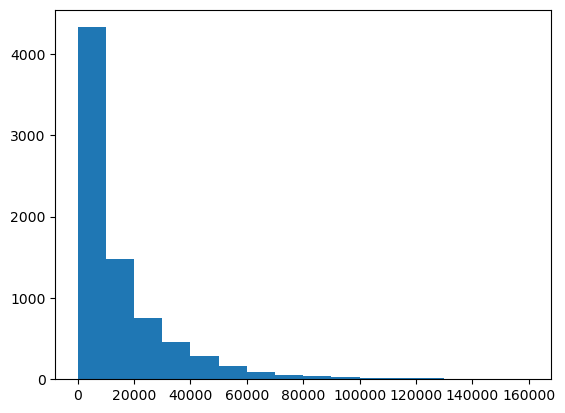

In [23]:
plt.hist(GDP_Per_Capita_series, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])
# plt.hist(gdp_2021['GDP_Per_Capita'], np.arrange(0,170000,10000)); 

(array([[7.728e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [7.728e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [4.326e+03, 1.479e+03, 7.550e+02, 4.620e+02, 2.900e+02, 1.620e+02,
         9.300e+01, 5.500e+01, 3.900e+01, 2.400e+01, 1.100e+01, 1.200e+01,
         1.000e+01, 2.000e+00, 5.000e+00, 2.000e+00]]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <a list of 3 BarContainer objects>)

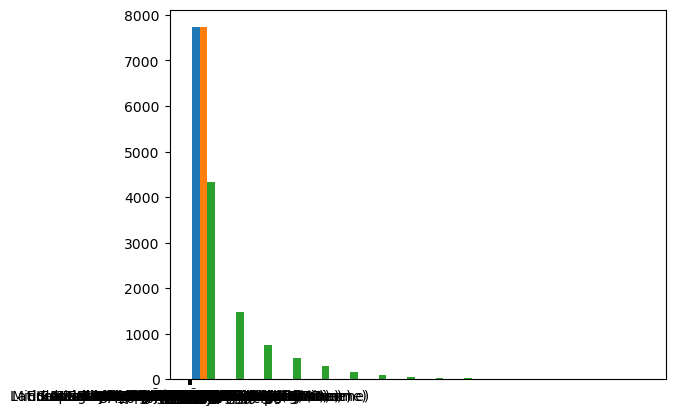

In [28]:
plt.hist(gdp_df, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])


(array([88., 61., 26., 18., 15., 15.,  7.,  5.,  2.,  0.,  2.,  1.,  0.,
         1.,  0.,  0.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <BarContainer object of 16 artists>)

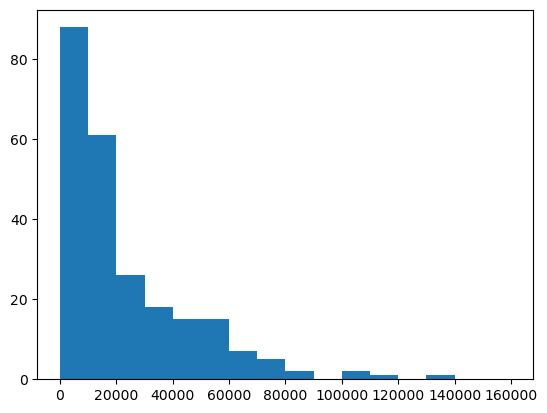

In [25]:
plt.hist(GDP_Per_Capita_2021_series, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])

(array([[241.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [241.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.],
        [ 88.,  61.,  26.,  18.,  15.,  15.,   7.,   5.,   2.,   0.,   2.,
           1.,   0.,   1.,   0.,   0.]]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000., 160000.]),
 <a list of 3 BarContainer objects>)

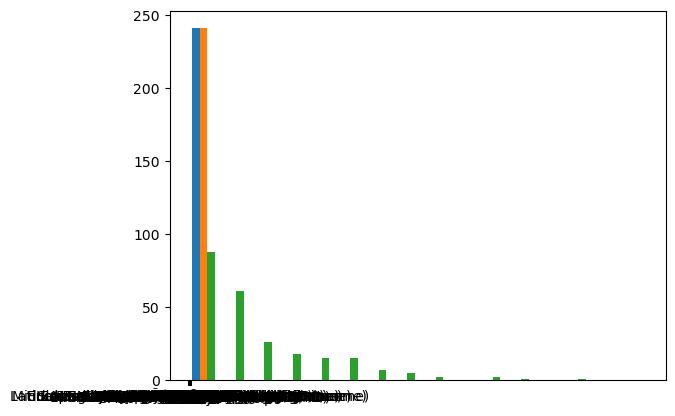

In [26]:
plt.hist(gdp_2021, bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000])

### Q11: right skewed

Q12 steps:

In [29]:
gdp_2021 = gdp_df[gdp_df['Year']==2021] 
gdp_2021_SortedBy_GDP_Per_Capita = gdp_2021.sort_values('GDP_Per_Capita')
gdp_2021_SortedBy_GDP_Per_Capita

,Country,Year,GDP_Per_Capita
972,Burundi,2021,787.942779
1216,Central African Republic,2021,924.151424
1629,Dem. Rep. Congo,2021,1184.720486
6285,Somalia,2021,1254.340664
5089,Niger,2021,1309.337926
...,...,...,...
680,Bermuda,2021,86699.251991
5761,Qatar,2021,102469.967574
3297,Ireland,2021,106570.398435
6123,Singapore,2021,118887.822066
